
# Introducción al aprendizaje automático

###  Laboratorio 1: Regresión en Boston
#### Grupo 30: Artola, Madriaga y Tula
---

### Índice de contenido:
* [Librerías externas](#Libs)
* [Carga del conjunto de datos](#datos)
* [Ejercicio 1:Descripción de los datos y tareas](#descripcion)
* [Ejercicio 2:Visualización de datos](#visualizacion)
* [Ejercicio 3:Regresión Lineal](#Regresión)
* [Ejercicio 4:Regresión Polinomial](#polinomial)
* [Ejercicio 5:Regresión con más de un atributo](#atributo)





### Librerías externas <a class="anchor" id="Libs"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Carga del conjunto de datos <a class="anchor" id="datos"></a>

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

C:\Users\Pablo Madriaga\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets i

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

Analizamos el contenido que posee cada columna de nuestro dataset

In [3]:
print(boston['data'])    # matriz con los datos de entrada (atributos)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [4]:
print(boston['target'])  # vector de valores a predecir

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [5]:
print(boston['feature_names'])   # nombres de los atributos para cada columna de 'data'

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
print(boston['DESCR'])  # descripción del dataset

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
print(boston['filename']) 

boston_house_prices.csv


In [8]:
print(boston['data_module'])

sklearn.datasets.data


In [9]:
#print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
#boston['feature_names']  # nombres de los atributos para cada columna de 'data'

Determinamos el tamaño de nuestro Dataset , es decir , el numero de columnas y filas que contiene.


In [10]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

#### División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [11]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

### Ejercicio 1: Descripción de los datos y tarea<a class="anchor" id="descripcion"></a>
---

**No hace falta escribir código para responder estas preguntas.**


1. ¿De qué se trata el conjunto de datos?

 La base de datos "Boston house prices dataset" , contiene los precios de las casas  de la ciudad de Boston en la década del 70 . Este dataset viene contenido dentro de las librerias Sklearn, la misma contiene 506 filas y 13 caracteristicas correspondientes a cada una. Nuestra Base de datos contiene las siguientes columnas:

* Data : Es la matriz con los datos de entrada(atributos). Variable Numérica.

* Target: Variable dependiente , contiene los precios de las casas . Es el vector de valores a predecir. Variable Numérica.

* Feature_names: Nombre de los atributos para cada columna de'Data'

* DESCR: Descripcion del dataset
    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
    
 - CRIM     per capita crime rate by town
 - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS    proportion of non-retail business acres per town
 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX      nitric oxides concentration (parts per 10 million)
 - RM       average number of rooms per dwelling
 - AGE      proportion of owner-occupied units built prior to 1940
 - DIS      weighted distances to five Boston employment centres
 - RAD      index of accessibility to radial highways
 - TAX      full-value property-tax rate per 10,000
 - PTRATIO  pupil-teacher ratio by town
 - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
 - LSTAT    % lower status of the population
 - MEDV     Median value of owner-occupied homes in $1000's
 
 
 
* Filename: Contiene el nombre del archivo.

* Data_module: Contiene los módulos de los datos.

2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?

Nuestra variable objetivo , dependiente es MEDV( Median value of owner-occupied homes in 1000's), la cuál representa el  valor medio de las viviendas ocupadas por sus propietarios en miles de dólareslos precios de las casas en la década del 70 en la ciudad de Boston. Es nuestra vector de valores a predecir.

3- ¿Qué información (atributos) hay disponibles para hacer la predicción?
Los atributos disponibles son los siguientes:

* CRIM per capita crime rate by town.Tasa de criminalidad per cápita por ciudad.

* ZN proportion of residential land zoned for lots over 25,000 sq.ft.Proporción ZN de suelo residencial zonificado para lotes de más de 25,000 pies cuadrados.

* INDUS proportion of non-retail business acres per town.Proporción de acres comerciales no minoristas por ciudad.

* CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).variable ficticia (= 1 si el tramo limita con el río; 0 en caso contrario).

* NOX nitric oxides concentration (parts per 10 million).Concentración de óxidos nítricos NOX (partes por 10 millones).

* RM average number of rooms per dwelling. Promedio de cuartos por vivienda.

* AGE proportion of owner-occupied units built prior to 1940. Proporción de unidades ocupadas por propietarios construidas antes de 1940.

* DIS weighted distances to five Boston employment centres. Distancias ponderadas a cinco centros de empleo de Boston.

* RAD index of accessibility to radial highways.Índice de accesibilidad a carreteras radiales.

* TAX full-value property-tax rate per 10,000.Tasa de impuesto a la propiedad de valor total por 10,000.

* PTRATIO pupil-teacher ratio by town.Alumno-profesor por localidad


* B 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town.Es la proporción de personas negras por ciudad.

* LSTAT % lower status of the population.Estado inferior de la población.

* MEDV Median value of owner-occupied homes in 1000's. Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares


4-¿Qué atributos imagina ud. que serán los más determinantes para la predicción?

Los siguientes atributos fueron considerados como determinantes para la predicción:

* CRIM: per capita crime rate by town.Tasa de criminalidad per cápita por ciudad.

* INDUS: proportion of non-retail business acres per town.Proporción de acres comerciales no minoristas por ciudad.

* NOX: nitric oxides concentration (parts per 10 million).Concentración de óxidos nítricos NOX (partes por 10 millones).
  
* RM: average number of rooms per dwelling. Promedio de cuartos por vivienda.

* TAX: full-value property-tax rate per 10,000.Tasa de impuesto a la propiedad de valor total por 10,000.

* LSTAT: % lower status of the population.Estado inferior de la población.




5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

Existen problemas o dilemas eticos relacionados en categorizar a las personas que viven en una determinada zona como clasificación de un status y calificar los datos de acuerdo a la tasa de criminalidad.

### Ejercicio 2: Visualización de datos <a class="anchor" id="visualizacion"></a>
---


1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

In [12]:
# Creación de un Dataframe a partir de Pandas 
df_boston=pd.DataFrame(boston.data)

In [13]:
df_boston.columns =boston.feature_names
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


* De lo anterior podemos corroborar que nuestro dataset contiene 506 filas  y 13 columnas

In [14]:
#Con el objetivo de conocer algunas medidas estadísticas empleamos un describe()
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


De lo anterior podemos concluir :

* No poseemos valores nulos 
* Podemos obtener para cada atributo , medidas estadisticas tales como:
    * mean()
    * std
    * min() y max()
    * Rangos intercuartilicos 
    

Graficamos los atributos vs Target para analizar su relación

In [15]:
df_boston['MEDV']=pd.DataFrame(boston.target)

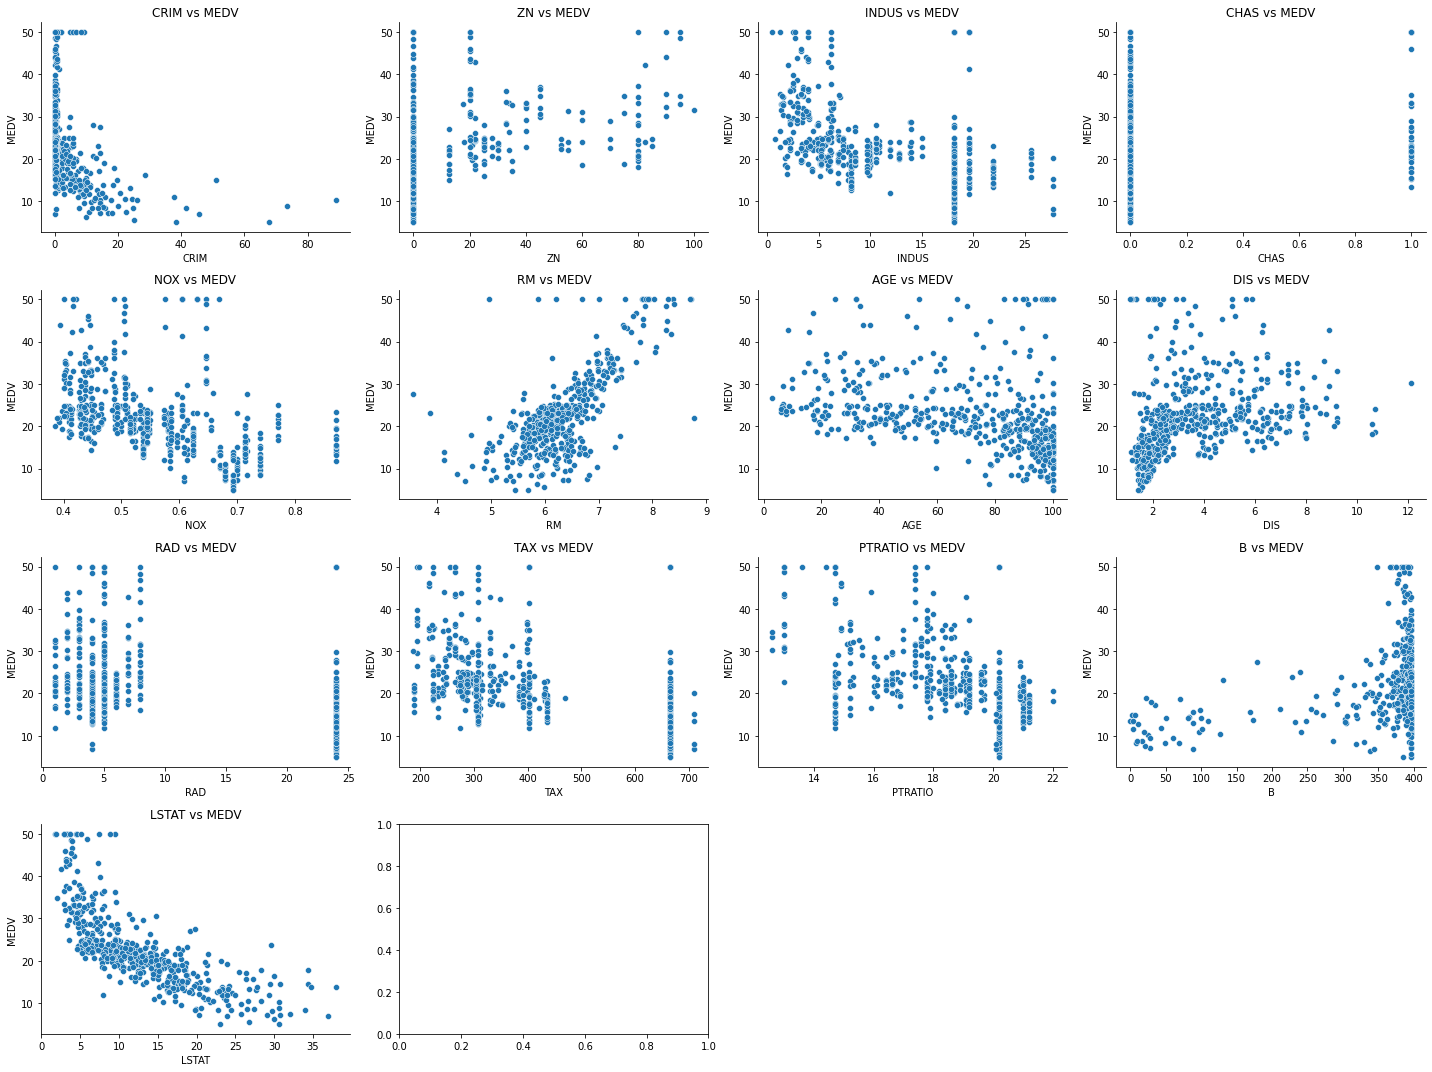

In [33]:
import seaborn as sns
fig,axes=plt.subplots(4,4,figsize=(20,15))
axes=axes.ravel()
for i , col in enumerate(df_boston.columns[:-1]):
    axes[i].set_title(f'{col} vs MEDV')
    sns.scatterplot(ax=axes[i],x=df_boston[col],y=df_boston['MEDV'],)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)
    
fig.subplots_adjust(hspace=0.3)
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.tight_layout();

Conclusiones: Graficamente podemos analizar la dispersión de los datos respecto a nuestra variable objetivo, centrándonos en los atributos que consideramos son importantes para determinar el valor de una propiedad.

 * A menor CRIM ,Tasa de criminalidad per cápita por ciudad, mayor es el precio de la propiedad
 * A menor INDUS,proporcion de hectares/Acres por ciudad ,  podemos observar una tendencia a aumentar el valor de la propiedad.
 * A mayor NOX , concentracion de oxidos nitricos , observamos una tendencia a disminuir el valor de una propiedad.
 * A mayor RM,promedio de cuartos por vivienda, mayor es el valor de la propiedad.
 * A mayor TAX , tasa de impuesto a la propiedad,mayor es el valor de la propiedad.
 * A mayor LSTAT , estado inferior de la población , menor es el valor de la propiedad.
 
 Podemos ver que existen variables 

In [34]:
# Otra forma de plantearlo , sin el dataframe

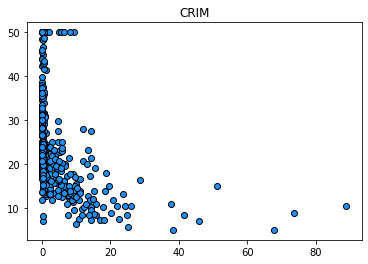

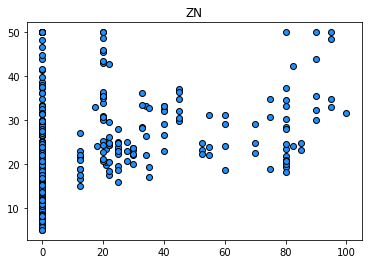

In [35]:
# 1. Resolver acá. Ayuda/ejemplo:
feature = 'CRIM'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()


 
feature = 'ZN'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()


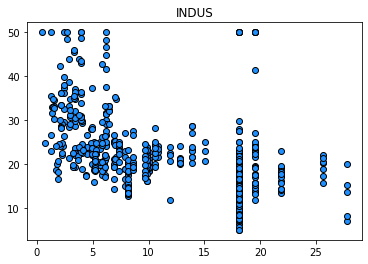

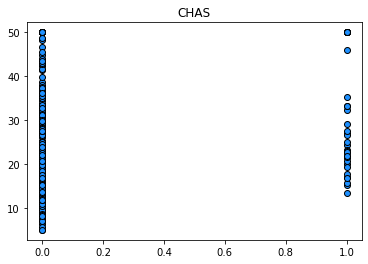

In [19]:
feature ='INDUS'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()
feature ='CHAS'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()


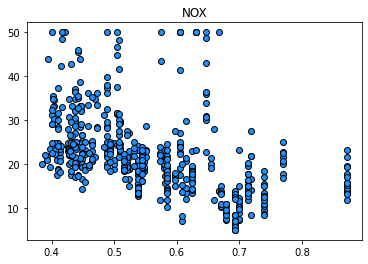

In [20]:
feature ='NOX'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

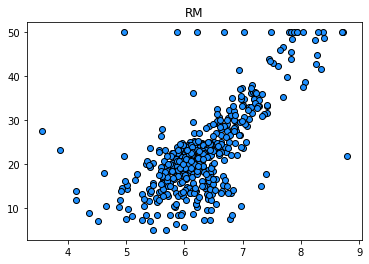

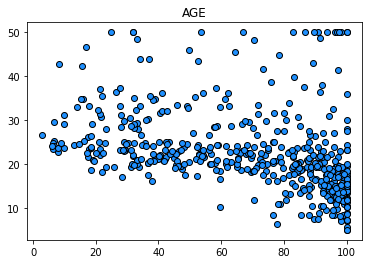

In [21]:
feature ='RM'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()
feature ='AGE'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

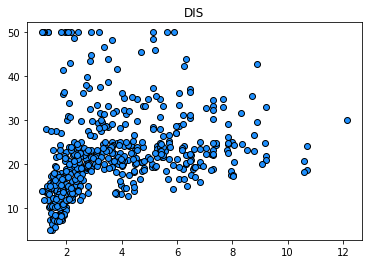

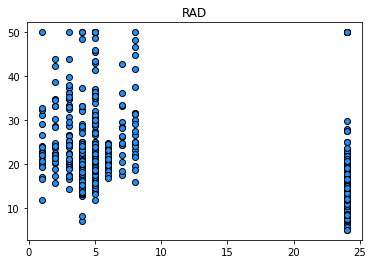

In [22]:
feature ='DIS'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()
feature ='RAD'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

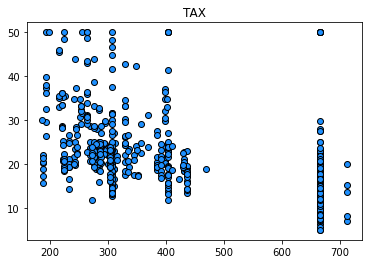

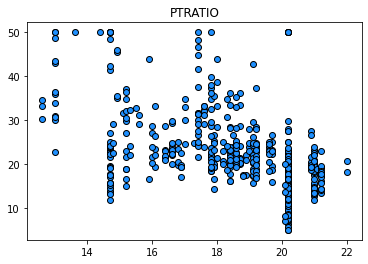

In [23]:
feature ='TAX'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()
feature ='PTRATIO'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

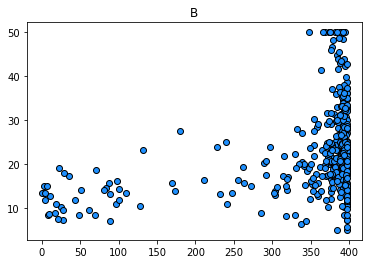

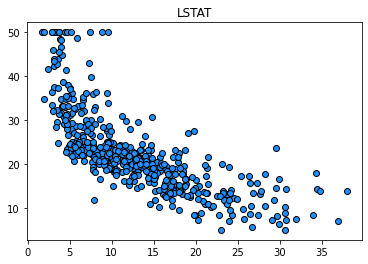

In [24]:
feature ='B'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()
feature ='LSTAT'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()


### Ejercicio 3: Regresión Lineal<a class="anchor" id="regresion"></a>

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [25]:
## División en Entrenamiento y Evaluación

# Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape
    

((404, 13), (102, 13))

In [26]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [27]:
# Primera opción: A mayor Crim las casas pierden valor
# 1. Resolver acá. Ayuda:
feature = 'CRIM'  # selecciono el atributo 'CRIM'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [28]:
# 2. Instancia y Entrenamiento.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
modelo_lineal=LinearRegression()
modelo_lineal.fit(X_train_f,y_train)

LinearRegression()

In [30]:
X_train_f.shape

(404, 1)

In [31]:
# 3. Predecir y evaluar acá.

In [32]:
y_test_predict=modelo_lineal.predict(X_test_f)
mse=mean_squared_error(y_test,y_test_predict)
mse

76.38674157646072

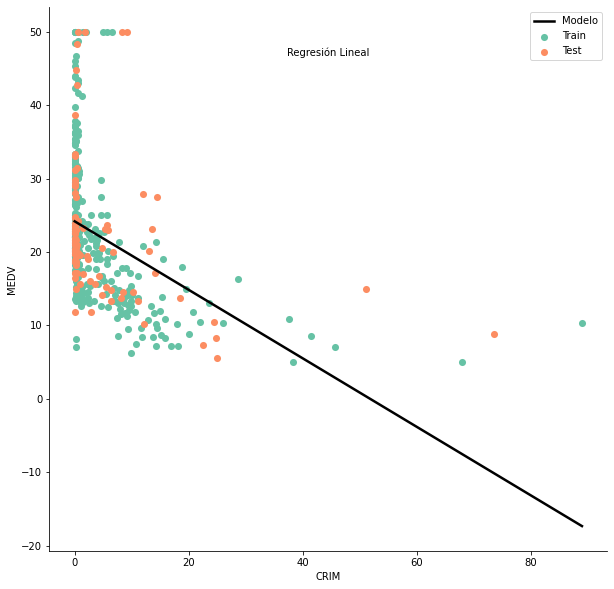

In [33]:
fig,axes=plt.subplots(figsize=(10,10))
c=sns.color_palette("Set2",3)
x_start=min(np.min(X_train_f),np.min(X_test_f))
x_end=max(np.max(X_train_f),np.max(X_test_f))
x=np.linspace(x_start,x_end,200).reshape(-1,1)
sns.lineplot(x=x.ravel(),y=modelo_lineal.predict(x),label='Modelo',lw=2.5,color='k')
sns.scatterplot(x=X_train_f.ravel(),y=y_train.ravel(),color=c[0],label='Train',s=50,linewidth=0)
sns.scatterplot(x=X_test_f.ravel(),y=y_test.ravel(),color=c[1],label='Test',edgecolor='k',s=50,linewidth=0)  
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
plt.xlabel('CRIM')
plt.ylabel('MEDV')
plt.title('Regresión Lineal',fontsize=10,y=0.9);             
             
             
             
             
             
             

5-Como podemos observar gráficamente , a medida que aumenta CRIM , la tasa de criminalidad , disminuye el valor de la propiedad, no se da un ajuste adecuado , por lo cuál vamos a proceder a realizar otra iteración con otro atributo 


In [34]:
# SEGUNDA opción: A mayor lstat las casas pierden valor
# 1. Resolver acá. Ayuda:
feature = 'LSTAT'  # selecciono el atributo 'CRIM'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [35]:
# 2. Instancia y Entrenamiento.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
modelo_lineal=LinearRegression()
modelo_lineal.fit(X_train_f,y_train)

LinearRegression()

In [37]:
X_train_f.shape

(404, 1)

In [38]:
#Predecir y evaluar
y_test_predict=modelo_lineal.predict(X_test_f)
mse=mean_squared_error(y_test,y_test_predict)
mse

46.33630536002592

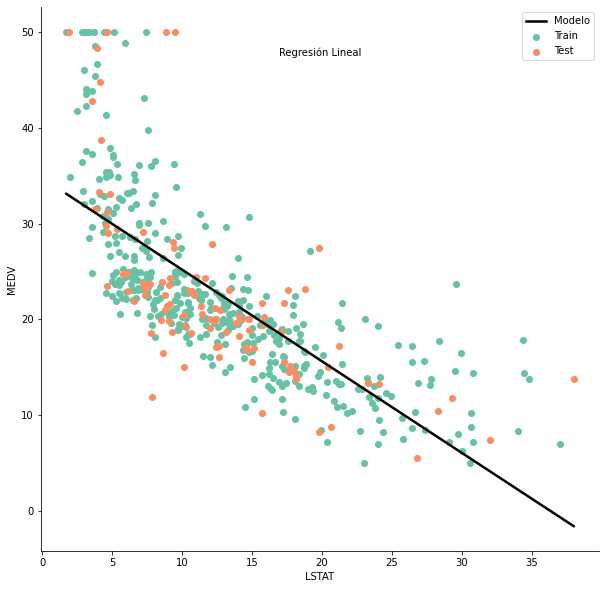

In [39]:
fig,axes=plt.subplots(figsize=(10,10))
c=sns.color_palette("Set2",3)
x_start=min(np.min(X_train_f),np.min(X_test_f))
x_end=max(np.max(X_train_f),np.max(X_test_f))
x=np.linspace(x_start,x_end,200).reshape(-1,1)
sns.lineplot(x=x.ravel(),y=modelo_lineal.predict(x),label='Modelo',lw=2.5,color='k')
sns.scatterplot(x=X_train_f.ravel(),y=y_train.ravel(),color=c[0],label='Train',s=50,linewidth=0)
sns.scatterplot(x=X_test_f.ravel(),y=y_test.ravel(),color=c[1],label='Test',edgecolor='k',s=50,linewidth=0)  
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('Regresión Lineal',fontsize=10,y=0.9);             
             
             
             
             
             

###  Conclusión:

* Corroboramos que a mayor LSTAT , el cuál representa  % lower status of the population.Estado inferior de la población , menor es el precio de las viviendas

### Ejercicio 4: Regresión Polinomial<a class="anchor" id="polinomial"></a>
En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [40]:
# 1. Resolver acá.
X_train_f.shape, X_test_f.shape


((404, 1), (102, 1))

#### Instanciar y entrenar

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


##Otras pruebas con varios de polinomios

In [42]:
train_errors = []
test_errors = []
degrees = [ 1, 2, 3, 4, 5, 6, 7, 8, 9,10]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_f, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

In [43]:
train_errors, test_errors

([36.52396640695966,
  28.18917233416823,
  26.78484649674975,
  25.84943285886596,
  25.034962537749585,
  25.014028004243862,
  25.013534969640393,
  24.845822984848176,
  24.825751378221064,
  30.33574945153579],
 [46.33630536002592,
  38.8468686617072,
  37.22424226844235,
  34.70486859809247,
  34.8347081997378,
  34.326207000211014,
  34.2611208058701,
  36.41511393834811,
  34.884095815655954,
  62.265113488609664])

In [44]:
# equivalente a:
#Z_train = pf.fit(X_train_f, y_train)
#lr.fit(Z_train, y_train)

In [45]:
# 2. Graficar curvas de error acá.

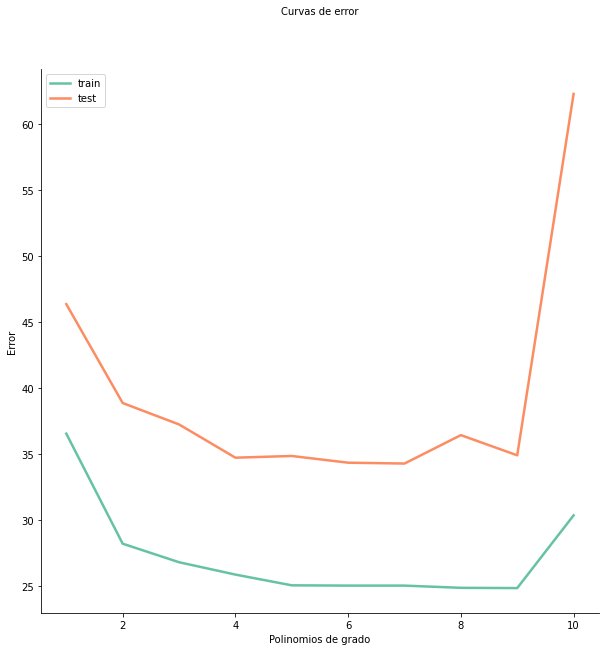

In [46]:
fig,axes=plt.subplots(figsize=(10,10))
c=sns.color_palette("Set2",3)
sns.lineplot(x=degrees,y=train_errors,label='train',lw=2.5,color=c[0])
sns.lineplot(x=degrees,y=test_errors,color=c[1],label='test',lw=2.5)
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
axes.tick_params(axis='both',which='major',labelsize=10)
axes.tick_params(axis='both',which='minor',labelsize=10)
plt.xlabel('Polinomios de grado')
plt.ylabel('Error')
plt.title('Curvas de error',fontsize=10,y=1.09);             
             
             
             

In [47]:
#3 -Podemos observar que existe un sobreajuste

In [48]:
# 4. Reconstruir mejor modelo acá y graficar.

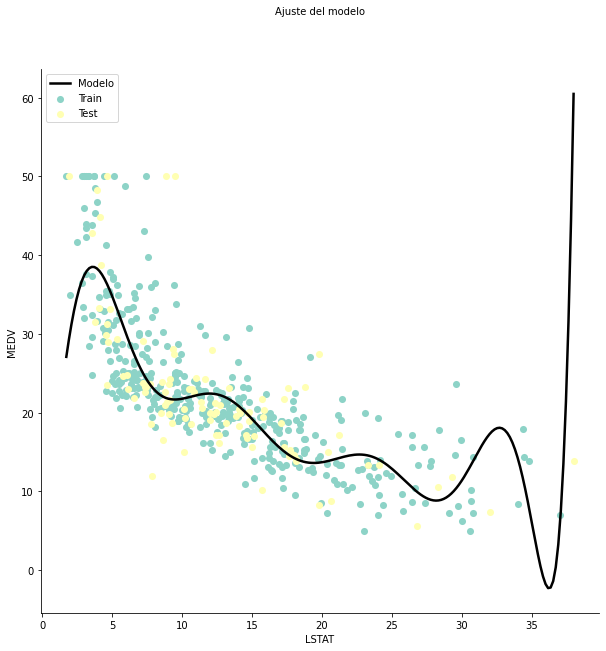

In [49]:
fig,axes=plt.subplots(figsize=(10,10))
c=sns.color_palette("Set3",3)
x_start=min(np.min(X_train_f),np.min(X_test_f))
x_end=max(np.max(X_train_f),np.max(X_test_f))
x=np.linspace(x_start,x_end,200).reshape(-1,1)
sns.lineplot(x=x.ravel(),y=model.predict(x.reshape(-1,1)),label='Modelo',lw=2.5,color='k')
sns.scatterplot(x=X_train_f.ravel(),y=y_train.ravel(),color=c[0],label='Train',s=50,linewidth=0)
sns.scatterplot(x=X_test_f.ravel(),y=y_test.ravel(),color=c[1],label='Test',edgecolor='k',s=50,linewidth=0)  
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('Ajuste del modelo',fontsize=10,y=1.09);             
             
             

5. Consideramos trabajar con los siguientes grados de polinomios degrees = [ 1, 2, 3, 4, 5, 6, 7, 8, 9,10] , podemos observar graficamente que a medida que aumenta el grado de polinomio disminuye el error para los datos de train, en cambio para los datos de test no ocurre el mismo comportamiento.

### Ejercicio 5: Regresión con más de un atributo<a class="anchor" id="atributo"></a>

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [50]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (boston['feature_names'] == 'LSTAT') | (boston['feature_names'] == 'CRIM')| (boston['feature_names'] == 'ZN')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 3), (102, 3))

In [51]:
# 2. Resolver acá.

train_errors = []
test_errors = []
degrees = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_fs, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)



In [52]:
train_errors, test_errors

([35.365389957784096,
  23.315535286493933,
  19.74408155822227,
  17.15360197503036,
  13.644916145224515,
  12.329739522127916,
  13.296141198311204,
  4238.505424622501,
  89173.34731414693,
  60289.31150952709],
 [48.50091428080834,
  38.401066289513956,
  36.95214639281615,
  34.73077509005667,
  260.47997939722046,
  652.4270563881404,
  1523768.8097438023,
  33382955936.80713,
  209186541239.197,
  3554607684078.475])

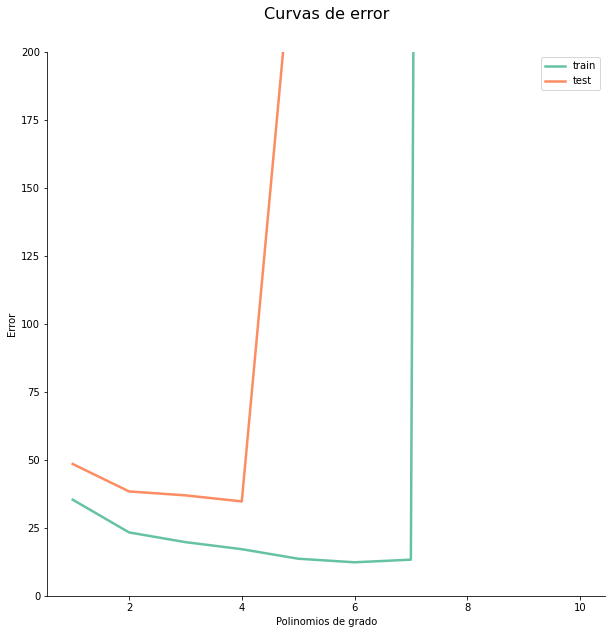

In [53]:
fig,axes=plt.subplots(figsize=(10,10))
c=sns.color_palette("Set2",3)
sns.lineplot(x=degrees,y=train_errors,label='train',lw=2.5,color=c[0])
sns.lineplot(x=degrees,y=test_errors,color=c[1],label='test',lw=2.5)
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
axes.tick_params(axis='both',which='major',labelsize=10)
axes.tick_params(axis='both',which='minor',labelsize=10)
plt.xlabel('Polinomios de grado')
plt.ylabel('Error')
plt.ylim(0,200)
plt.title('Curvas de error',fontsize=16,y=1.05);             
             
             

#### 3-Conclusión
Cuando empleamos los atributos CRIM , LSTAT y ZN , graficamente  se observan por ejemplo que para un polinomio de grado 2 el error es menor  respecto al test y train 
Como segunda iteración podemos emplear otro de los atributos para analizar su comportamiento.VER